# Bangalore House Price  Pred. Using ML KNN Model

# Bangalore House Price  Pred. Using ML KNN Model

In [1]:
# Firstly We Have to IMPORT the Libraries -
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Importing the Data from our system - 
data = pd.read_csv('D:/Top Mentor/Classes Details/4th May/Files/KNN_Project_5&6/KNN Assignment/bangalore house price prediction OHE-data.csv')
print(data.head(2))

   bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0   3.0      2.0  150.0          1672.0    3     8971.291866   
1   3.0      3.0  149.0          1750.0    3     8514.285714   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0                           1  ...   

   location_Kalena Agrahara  location_Horamavu Agara  location_Vidyaranyapura  \
0                         0                        0                        0   
1                         0                        0                        0   

   location_BTM 2nd Stage  location_Hebbal Kempapura  location_Hosur Road  \
0                       0                          0                    0   
1                       0                      

In [4]:
## Firstly We have to copy this data as our data keep safe - 
df = data.copy()
print(df.head(2))

   bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0   3.0      2.0  150.0          1672.0    3     8971.291866   
1   3.0      3.0  149.0          1750.0    3     8514.285714   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0                           1  ...   

   location_Kalena Agrahara  location_Horamavu Agara  location_Vidyaranyapura  \
0                         0                        0                        0   
1                         0                        0                        0   

   location_BTM 2nd Stage  location_Hebbal Kempapura  location_Hosur Road  \
0                       0                          0                    0   
1                       0                      

In [5]:
#  Checking Data Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [6]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [17]:
## Here is huge numbers of columns but we required only 5 columns , So we are creating new Dataframe . 
# As 'df' is your original DataFrame
selected_columns = [['bath', 'balcony', 'price', 'total_sqft_int', 'bhk','price_per_sqft']]
df1 = df[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk','price_per_sqft']]
print(df1.head())

   bath  balcony  price  total_sqft_int  bhk  price_per_sqft
0   3.0      2.0  150.0          1672.0    3     8971.291866
1   3.0      3.0  149.0          1750.0    3     8514.285714
2   3.0      2.0  150.0          1750.0    3     8571.428571
3   2.0      2.0   40.0          1250.0    2     3200.000000
4   2.0      2.0   83.0          1200.0    2     6916.666667


In [30]:
## After Creation of our required data then we start our proper analysis - 
## Data Reading Basic Steps :-
print('Min Price of House- ',df1['price'].min())
print('Max Price of House - ',df1['price'].max())
print('Min price_per_sqft - ',df1['price_per_sqft'].min())
print('Max price_per_sqft - ',df1['price_per_sqft'].max())
print('no of columns - \n' , df1.columns)
print('no of shapes - ' , df1.shape)
print('no of lenght - ' , len(df1))
print('no of datatype - \n' , df1.dtypes)

Min Price of House-  10.0
Max Price of House -  2912.0
Min price_per_sqft -  1250.0
Max price_per_sqft -  35000.0
no of columns - 
 Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft'], dtype='object')
no of shapes -  (7120, 6)
no of lenght -  7120
no of datatype - 
 bath              float64
balcony           float64
price             float64
total_sqft_int    float64
bhk                 int64
price_per_sqft    float64
dtype: object


In [31]:
print('DataSet Information -\n',df1.describe())

DataSet Information -
               bath      balcony        price  total_sqft_int          bhk  \
count  7120.000000  7120.000000  7120.000000     7120.000000  7120.000000   
mean      2.390871     1.572759    96.454991     1479.729806     2.465169   
std       0.876822     0.770583   116.185034      913.779769     0.841520   
min       1.000000     0.000000    10.000000      350.000000     1.000000   
25%       2.000000     1.000000    49.230000     1100.000000     2.000000   
50%       2.000000     2.000000    69.000000     1255.000000     2.000000   
75%       3.000000     2.000000   104.000000     1640.250000     3.000000   
max       9.000000     3.000000  2912.000000    30400.000000     9.000000   

       price_per_sqft  
count     7120.000000  
mean      5923.806855  
std       2556.650935  
min       1250.000000  
25%       4416.761042  
50%       5417.855613  
75%       6618.285651  
max      35000.000000  


In [25]:
# Check Correlation For Features Selection
df1.corr()["price"]

bath              0.523941
balcony           0.138946
price             1.000000
total_sqft_int    0.797955
bhk               0.497817
price_per_sqft    0.717821
Name: price, dtype: float64

In [26]:
# We Selecting  Features : bath, total_sqft_int, price_per_sqft Corr > 0.50

In [32]:
## Now we starting the training & Testing for data - 
X = df[['bath','total_sqft_int','price_per_sqft']]
y =df['price'] 

In [37]:
X.head()

,bath,total_sqft_int,price_per_sqft
0,3.0,1672.0,8971.291866
1,3.0,1750.0,8514.285714
2,3.0,1750.0,8571.428571
3,2.0,1250.0,3200.000000
4,2.0,1200.0,6916.666667


In [38]:
 y.head()

0    150.0
1    149.0
2    150.0
3     40.0
4     83.0
Name: price, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train , X_test , y_train ,y_test =train_test_split(X,y,test_size=0.2 ,random_state=42)

In [41]:
X_train.shape , y_train.shape

((5696, 3), (5696,))

In [42]:
X_test.shape , y_test.shape

((1424, 3), (1424,))

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
model = KNeighborsRegressor(n_neighbors=3)
model

KNeighborsRegressor(n_neighbors=3)

In [45]:
model_train = model.fit(X_train , y_train)
print('The model training is completed')

The model training is completed


In [46]:
from sklearn.metrics import r2_score,mean_absolute_error
pred = model_train.predict(X_test)
pred

array([46.66666667, 59.33333333, 65.        , ..., 56.66666667,
       26.33333333, 49.33      ])

In [47]:
model_train.score(X_train , y_train)

0.9578596731264113

In [48]:
r2_score(y_test,pred)

0.9861872544325201

In [49]:
r2_score(y_test,pred)

0.9861872544325201

In [59]:
error = []
k = []
for i in range (1,15):
    print('When K = ',i)
    model = KNeighborsRegressor(n_neighbors=i)
    model_train = model.fit(X_train ,y_train)
    print('The Model Training in Completed')
    err = round(1- model_train.score ( X_train , y_train),3)
    error.append(err)
    k.append(i)

When K =  1
The Model Training in Completed
When K =  2
The Model Training in Completed
When K =  3
The Model Training in Completed
When K =  4
The Model Training in Completed
When K =  5
The Model Training in Completed
When K =  6
The Model Training in Completed
When K =  7
The Model Training in Completed
When K =  8
The Model Training in Completed
When K =  9
The Model Training in Completed
When K =  10
The Model Training in Completed
When K =  11
The Model Training in Completed
When K =  12
The Model Training in Completed
When K =  13
The Model Training in Completed
When K =  14
The Model Training in Completed


In [60]:
error

[0.0,
 0.018,
 0.042,
 0.058,
 0.056,
 0.077,
 0.085,
 0.099,
 0.113,
 0.123,
 0.132,
 0.142,
 0.151,
 0.154]

In [61]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [62]:
## Creating the datafram -
df2 = pd.DataFrame({'K': k , 'Error': error})
df2

,K,Error
0,1,0.000
1,2,0.018
2,3,0.042
3,4,0.058
4,5,0.056
5,6,0.077
6,7,0.085
7,8,0.099
8,9,0.113
9,10,0.123


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='K', ylabel='Error'>

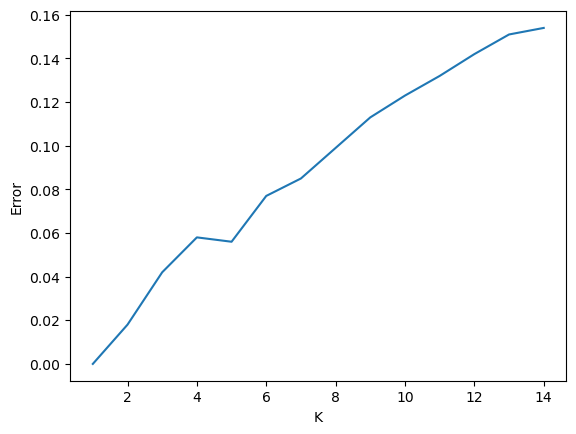

In [63]:
sns.lineplot(x = 'K' , y = 'Error' ,data =df2)

In [55]:
import joblib

In [64]:
joblib.dump(model,'KNN_RegV2.sav')

['KNN_RegV2.sav']